### Import Packages

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from torch.utils.data.dataloader import default_collate
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [ ]:
input_size = 7  # Adjust the input size based on the selected features
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 80
batch_size = 7*24
learning_rate = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, data in enumerate(train_loader):
        inputs = data[:, 1:].unsqueeze(1).to(device)  # Access the first tensor in the list, select the first column (scaled feature values)
        labels = data[:, 0].unsqueeze(1).to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')

print('Training finished.')

Epoch [1/80], Average Loss: 2683.5708
Epoch [2/80], Average Loss: 1270.9429
Epoch [3/80], Average Loss: 1223.3352
Epoch [4/80], Average Loss: 1223.7346
Epoch [5/80], Average Loss: 1134.4894
Epoch [6/80], Average Loss: 934.5113
Epoch [7/80], Average Loss: 921.4258
Epoch [8/80], Average Loss: 912.3504
Epoch [9/80], Average Loss: 891.8869
Epoch [10/80], Average Loss: 882.5128
Epoch [11/80], Average Loss: 871.6192
Epoch [12/80], Average Loss: 862.3278
Epoch [13/80], Average Loss: 845.8649
Epoch [14/80], Average Loss: 838.8885
Epoch [15/80], Average Loss: 832.8611
Epoch [16/80], Average Loss: 821.2888
Epoch [17/80], Average Loss: 806.4613
Epoch [18/80], Average Loss: 799.3953
Epoch [19/80], Average Loss: 792.8704
Epoch [20/80], Average Loss: 779.5415
Epoch [21/80], Average Loss: 767.2000
Epoch [22/80], Average Loss: 748.9495
Epoch [23/80], Average Loss: 746.0603
Epoch [24/80], Average Loss: 730.5214
Epoch [25/80], Average Loss: 721.7772
Epoch [26/80], Average Loss: 724.3001
Epoch [27/80], A

In [ ]:
model.eval()
with torch.no_grad():
    total_loss = 0

    for i, data in enumerate(test_loader):
        inputs = data[:, 1:].unsqueeze(1).to(device)  # Adjust the input indices based on the selected features
        labels = data[:, 0].unsqueeze(1).to(device)
        # print(labels)
        # print('=====================')
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

Test Loss: 738.3349


tensor([[30.2624],
        [30.6958],
        [31.7897],
        [31.7242],
        [31.5913],
        [32.3850],
        [29.7049],
        [27.4220],
        [32.0872],
        [35.7283],
        [32.7708],
        [38.1749],
        [33.8329],
        [33.2058],
        [32.3650],
        [33.6693],
        [29.8890],
        [33.5628],
        [31.0509],
        [31.3765],
        [32.7446],
        [30.1218],
        [38.4692],
        [28.7271],
        [31.4078],
        [30.2793],
        [33.3546],
        [38.0835],
        [47.0489],
        [35.2340],
        [36.5294],
        [37.7406],
        [43.2925],
        [37.7913],
        [33.1797],
        [32.4574],
        [37.6126],
        [39.5958],
        [36.9074],
        [39.8615],
        [39.5579],
        [35.5167],
        [36.2534],
        [37.3528],
        [33.4849],
        [33.1282],
        [33.0528],
        [33.9437],
        [33.0270],
        [33.3299],
        [36.0179],
        [32.2931],
        [28.

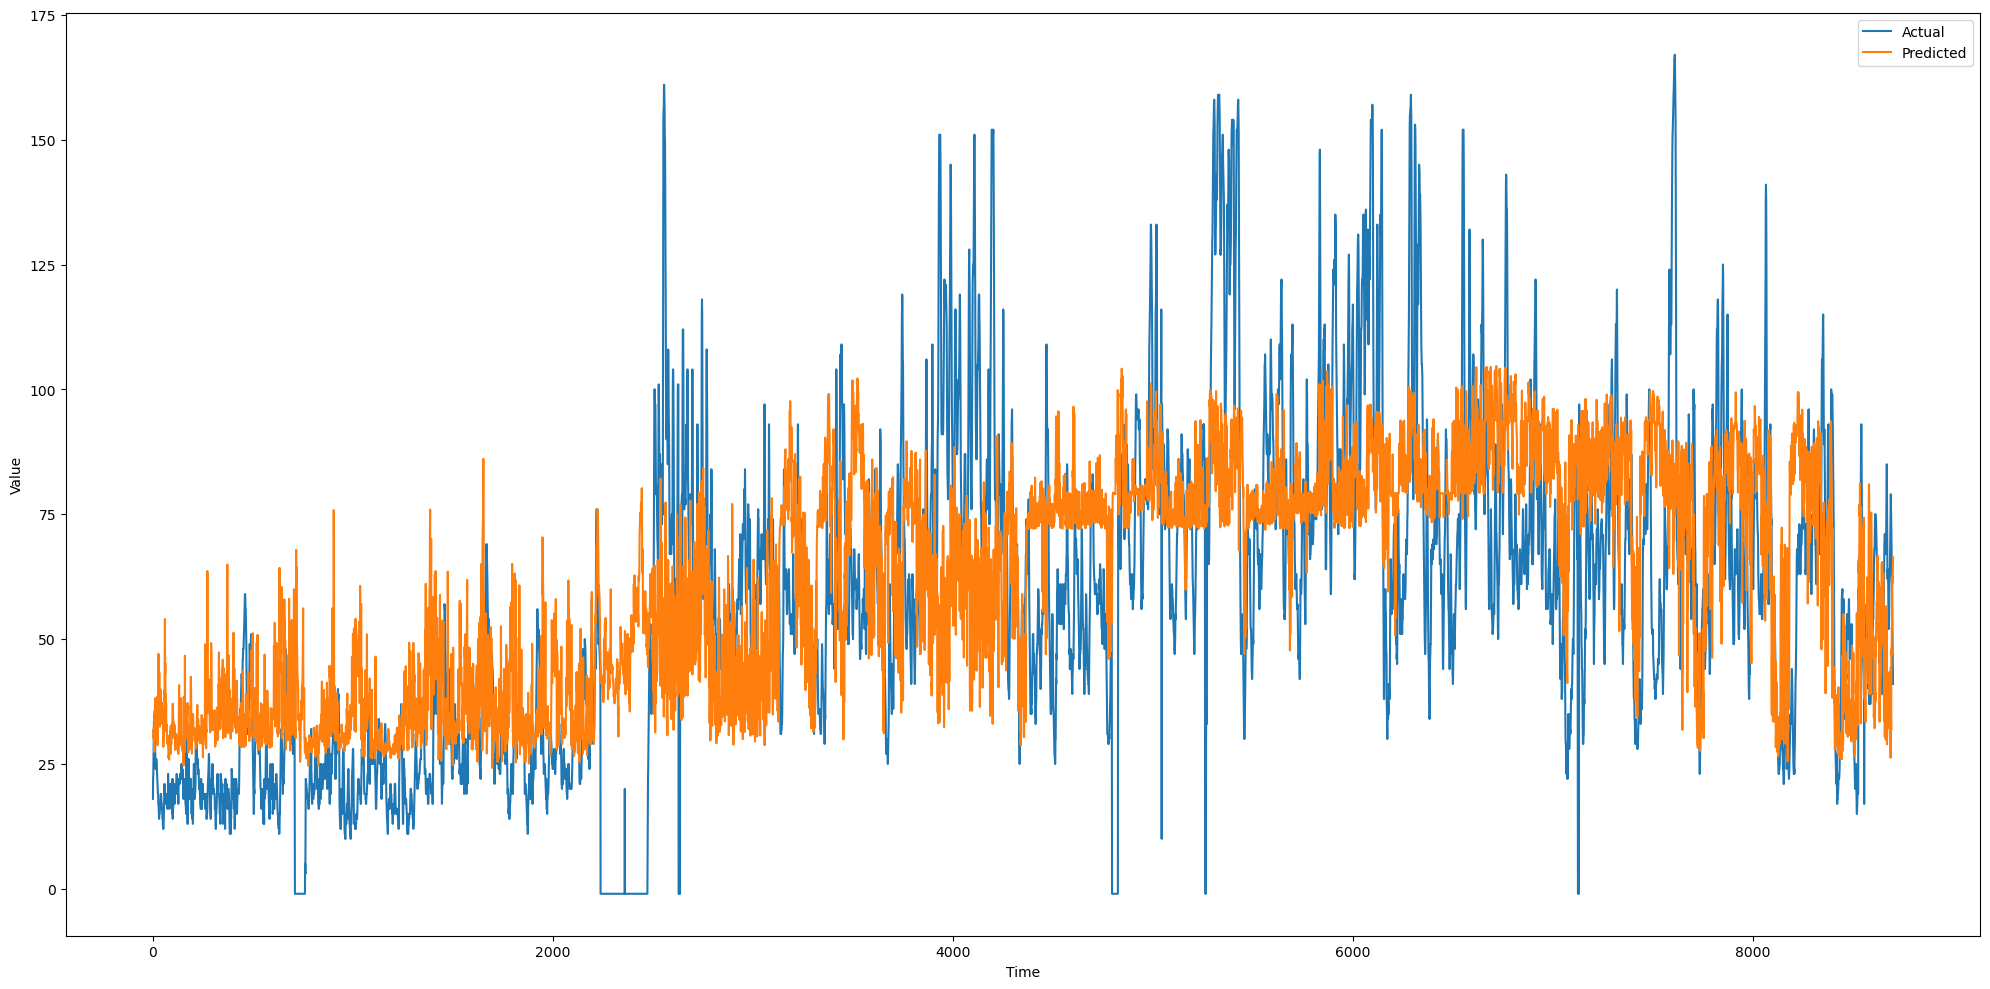

In [ ]:
# 將模型設為評估模式
model.eval()
with torch.no_grad():
    # 建立空列表來儲存預測值和實際值
    predictions = []
    actual_values = []

    for data in test_loader:
        inputs = data[:, 1:].unsqueeze(1).to(device)
        labels = data[:, 0].unsqueeze(1).to(device)
        # print(labels)
        outputs = model(inputs)
        print(outputs)
        # 將預測值和實際值轉換為NumPy陣列
        predictions.extend(outputs.cpu().numpy().flatten())
        actual_values.extend(labels.cpu().numpy().flatten())

    # 繪製預測值和實際值的折線圖
    plt.figure(figsize=(20, 10))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()  
    plt.show()

In [2]:
# Load data from 2018/06-2023/05
# Data source: 行政院環境保護署 https://data.epa.gov.tw/dataset/detail/AQX_P_488
AQI_201806 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-06).csv')
AQI_201807 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-07).csv')
AQI_201808 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-08).csv')
AQI_201809 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-09).csv')
AQI_201810 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-10).csv')
AQI_201811 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-11).csv')
AQI_201812 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-12).csv')
AQI_201901 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-01).csv')
AQI_201902 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-02).csv')
AQI_201903 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-03).csv')
AQI_201904 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-04).csv')
AQI_201905 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-05).csv')
AQI_201906 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-06).csv')
AQI_201907 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-07).csv')
AQI_201908 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-08).csv')
AQI_201909 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-09).csv')
AQI_201910 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-10).csv')
AQI_201911 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-11).csv')
AQI_201912 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-12).csv')
AQI_202001 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-01).csv')
AQI_202002 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-02).csv')
AQI_202003 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-03).csv')
AQI_202004 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-04).csv')
AQI_202005 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-05).csv')
AQI_202006 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-06).csv')
AQI_202007 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-07).csv')
AQI_202008 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-08).csv')
AQI_202009 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-09).csv')
AQI_202010 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-10).csv')
AQI_202011 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-11).csv')
AQI_202012 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-12).csv')
AQI_202101 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-01).csv')
AQI_202102 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-02).csv')
AQI_202103 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-03).csv')
AQI_202104 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-04).csv')
AQI_202105 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-05).csv')
AQI_202106 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-06).csv')
AQI_202107 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-07).csv')
AQI_202108 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-08).csv')
AQI_202109 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-09).csv')
AQI_202110 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-10).csv')
AQI_202111 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-11).csv')
AQI_202112 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-12).csv')
AQI_202201 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-01).csv')
AQI_202202 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-02).csv')
AQI_202203 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-03).csv')
AQI_202204 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-04).csv')
AQI_202205 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-05).csv')
AQI_202206 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-06).csv')
AQI_202207 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-07).csv')
AQI_202208 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-08).csv')
AQI_202209 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-09).csv')
AQI_202210 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-10).csv')
AQI_202211 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-11).csv')
AQI_202212 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-12).csv')
AQI_202301 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-01).csv')
AQI_202302 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-02).csv')
AQI_202303 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-03).csv')
AQI_202304 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-04).csv')
AQI_202305 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-05).csv')

In [3]:
AQI_202105

,"""sitename""","""county""","""aqi""","""pollutant""","""status""","""so2""","""co""","""o3""","""o3_8hr""","""pm10""",...,"""winddirec""","""datacreationdate""","""unit""","""co_8hr""","""pm2.5_avg""","""pm10_avg""","""so2_avg""","""longitude""","""latitude""","""siteid"""
0,屏東(枋寮),屏東縣,68.0,細懸浮微粒,普通,0.5,0.3,15.2,45,48.0,...,65,2021-05-01 00:00,NaN,0.3,22.0,41.0,4.0,120.591167,22.370947,313
1,馬祖,連江縣,129.0,臭氧八小時,對敏感族群不健康,3.3,0.33,59.3,79,29.0,...,207,2021-05-01 00:00,NaN,0.3,31.0,44.0,3.0,119.949875,26.160469,75
2,埔里,南投縣,85.0,細懸浮微粒,普通,2.0,0.45,NaN,65,55.0,...,351,2021-05-01 00:00,NaN,0.4,29.0,43.0,1.0,120.967903,23.968842,72
3,復興,高雄市,74.0,臭氧八小時,普通,1.6,0.5,50,62,23.0,...,238,2021-05-01 00:00,NaN,0.5,14.0,24.0,2.0,120.312017,22.608711,71
4,永和,新北市,77.0,細懸浮微粒,普通,1.4,0.94,18.8,35,35.0,...,142,2021-05-01 00:00,NaN,1.2,26.0,44.0,2.0,121.516306,25.017000,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120379,苗栗,苗栗縣,20.0,NaN,良好,2.1,0.24,12.8,13,5.0,...,220,2021-05-31 23:00,NaN,0.4,6.0,5.0,2.0,120.820200,24.565269,26
120380,臺南,臺南市,29.0,NaN,良好,1.8,0.18,31.2,31,13.0,...,217,2021-05-31 23:00,NaN,0.2,6.0,17.0,2.0,120.202617,22.984581,46
120381,安南,臺南市,40.0,NaN,良好,1.9,0.24,29.2,31,24.0,...,245,2021-05-31 23:00,NaN,0.2,12.0,24.0,2.0,120.217500,23.048197,45
120382,淡水,新北市,20.0,NaN,良好,1.8,0.37,13.5,22,5.0,...,NaN,2021-05-31 23:00,NaN,0.3,5.0,8.0,2.0,121.449239,25.164500,10


### Split Train & Test Data

In [4]:
# Train Data: 2018/06 - 2022/05
AQI_train_data_list = [AQI_201806, AQI_201807, AQI_201808, AQI_201809, AQI_201810, AQI_201811, AQI_201812, AQI_201901,
                       AQI_201902, AQI_201903, AQI_201904, AQI_201905, AQI_201906, AQI_201907, AQI_201908, AQI_201909,
                       AQI_201910, AQI_201911, AQI_201912, AQI_202001, AQI_202002, AQI_202003, AQI_202004, AQI_202005,
                       AQI_202006, AQI_202007, AQI_202008, AQI_202009, AQI_202010, AQI_202011, AQI_202012, AQI_202101, 
                       AQI_202102, AQI_202103, AQI_202104, AQI_202105, AQI_202106, AQI_202107, AQI_202108, AQI_202109,
                       AQI_202110, AQI_202111, AQI_202112, AQI_202201, AQI_202202, AQI_202203, AQI_202204, AQI_202205]
print(len(AQI_train_data_list))
# Test Data: 2022/06 - 2023/05
AQI_test_data_list = [AQI_202206, AQI_202207, AQI_202208, AQI_202209, AQI_202210, AQI_202211, AQI_202212,
                      AQI_202301, AQI_202302, AQI_202303, AQI_202304, AQI_202305]
print(len(AQI_test_data_list))

48
12


In [5]:
# Train
# Create empty DF
train_data = pd.DataFrame()
for train in AQI_train_data_list:
    train_data = pd.concat([train_data, train], axis=0, ignore_index=True)
# Test
# Create empty DF
test_data = pd.DataFrame()
for test in AQI_test_data_list:
    test_data = pd.concat([test_data, test], axis=0, ignore_index=True)

In [6]:
# release memory
for data in AQI_train_data_list, AQI_test_data_list:
    data = ''

### Pick a Location

In [133]:
# Location = 臺南
train_data = train_data[train_data['"sitename"']=='臺南']
test_data = test_data[test_data['"sitename"']=='臺南']
# Reset index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [134]:
train_data

,"""sitename""","""county""","""aqi""","""pollutant""","""status""","""so2""","""co""","""o3""","""o3_8hr""","""pm10""",...,"""winddirec""","""datacreationdate""","""unit""","""co_8hr""","""pm2.5_avg""","""pm10_avg""","""so2_avg""","""longitude""","""latitude""","""siteid"""
0,臺南,臺南市,22.0,NaN,良好,2.6,0.22,15,17.0,12.0,...,359.0,2018-06-01 00:00,NaN,0.2,7.0,17.0,4.0,120.202617,22.984581,NaN
1,臺南,臺南市,24.0,NaN,良好,2.4,0.17,15,17.0,16.0,...,8.4,2018-06-01 01:00,NaN,0.2,7.0,16.0,4.0,120.202617,22.984581,NaN
2,臺南,臺南市,24.0,NaN,良好,2.4,0.1,16,16.0,15.0,...,1.4,2018-06-01 02:00,NaN,0.2,8.0,16.0,4.0,120.202617,22.984581,NaN
3,臺南,臺南市,23.0,NaN,良好,2.6,0.09,13,15.0,13.0,...,358.0,2018-06-01 03:00,NaN,0.2,7.0,16.0,4.0,120.202617,22.984581,NaN
4,臺南,臺南市,22.0,NaN,良好,2.9,0.11,11,15.0,13.0,...,46.0,2018-06-01 04:00,NaN,0.2,7.0,16.0,3.0,120.202617,22.984581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40089,臺南,臺南市,24.0,NaN,良好,0.3,0.12,23.2,26.1,12.0,...,219,2022-05-31 19:00,NaN,0,6.0,16.0,0.0,120.202617,22.984581,46.0
40090,臺南,臺南市,23.0,NaN,良好,0.3,0.11,20.4,25.0,13.0,...,219,2022-05-31 20:00,NaN,0,6.0,15.0,0.0,120.202617,22.984581,46.0
40091,臺南,臺南市,22.0,NaN,良好,0.2,0.11,21.4,24.2,15.0,...,207,2022-05-31 21:00,NaN,0.1,6.0,14.0,0.0,120.202617,22.984581,46.0
40092,臺南,臺南市,32.0,NaN,良好,0.2,0.14,12.8,22.2,21.0,...,187,2022-05-31 22:00,NaN,0.1,5.0,15.0,0.0,120.202617,22.984581,46.0


### Pick Columns Needed

In [135]:
cols_needed = ['"aqi"', '"datacreationdate"', '"windspeed"', '"winddirec"']
train_data_use = train_data[cols_needed]
test_data_use = test_data[cols_needed]

In [136]:
train_data_use

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec"""
0,22.0,2018-06-01 00:00,2.1,359.0
1,24.0,2018-06-01 01:00,2.4,8.4
2,24.0,2018-06-01 02:00,2.0,1.4
3,23.0,2018-06-01 03:00,1.9,358.0
4,22.0,2018-06-01 04:00,2.4,46.0
...,...,...,...,...
40089,24.0,2022-05-31 19:00,1,219
40090,23.0,2022-05-31 20:00,1.4,219
40091,22.0,2022-05-31 21:00,1.1,207
40092,32.0,2022-05-31 22:00,0.7,187


In [137]:
test_data_use

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec"""
0,18.0,2022-06-01 00:00,0.8,157
1,22.0,2022-06-01 01:00,0.8,172
2,23.0,2022-06-01 02:00,1,169
3,27.0,2022-06-01 03:00,1.5,143
4,31.0,2022-06-01 04:00,1.9,139
...,...,...,...,...
8695,57.0,2023-05-31 19:00,0.5,323
8696,55.0,2023-05-31 20:00,0.7,353
8697,49.0,2023-05-31 21:00,0.6,352
8698,44.0,2023-05-31 22:00,0.6,355


### Merge Weather Data

In [138]:
# Weather Data Scrapped from CODiS (https://e-service.cwb.gov.tw/HistoryDataQuery/index.jsp)
weather_1 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/tainan_weather.csv')
weather_2 = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Final Project/tainan_weather-1.csv')

In [139]:
# Keep only AQI related columns
cols_needed = ['觀測時間(hour)', '氣溫(℃)', '相對溼度(%)', '最大陣風(m/s)', '降水量(mm)', '降水時數(h)']
weather_1 = weather_1[cols_needed]
weather_2 = weather_2[cols_needed]


In [140]:
# Turn weather 1 into data format
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2020-06-12') + pd.DateOffset(days=1) - pd.DateOffset(minutes=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
weather_1['觀測時間(hour)'] = date_range.strftime('%Y-%m-%d ') + (weather_1['觀測時間(hour)'] - 1).astype(str).str.zfill(2) + ':00'
# Turn weather 2 into data format
start_date = pd.to_datetime('2020-06-13')
end_date = pd.to_datetime('2023-05-31') + pd.DateOffset(days=1) - pd.DateOffset(minutes=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
weather_2['觀測時間(hour)'] = date_range.strftime('%Y-%m-%d ') + (weather_2['觀測時間(hour)'] - 1).astype(str).str.zfill(2) + ':00'


In [141]:
weather = pd.concat([weather_1,weather_2], axis=0, ignore_index=True)
weather

,觀測時間(hour),氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
0,2018-06-01 00:00,29.2,76,7.5,0.0,0.0
1,2018-06-01 01:00,28.8,78,7.1,0.0,0.0
2,2018-06-01 02:00,29.0,77,5.1,0.0,0.0
3,2018-06-01 03:00,28.6,79,5.3,0.0,0.0
4,2018-06-01 04:00,28.5,79,5.9,0.0,0.0
...,...,...,...,...,...,...
43819,2023-05-31 19:00,28.7,74,9.3,0.0,0.0
43820,2023-05-31 20:00,28.4,77,8.2,0.0,0.0
43821,2023-05-31 21:00,28.0,79,9.3,0.0,0.0
43822,2023-05-31 22:00,27.8,81,6.5,0.0,0.0


In [142]:
# Merge weather data to train/test data
train_data_use = train_data_use.merge(weather, left_on='"datacreationdate"', right_on='觀測時間(hour)', how='left')
test_data_use = test_data_use.merge(weather, left_on='"datacreationdate"', right_on='觀測時間(hour)', how='left')
train_data_use.drop(['觀測時間(hour)'], axis=1, inplace=True)
test_data_use.drop(['觀測時間(hour)'], axis=1, inplace=True)

In [143]:
# Cleanse NAs of string format
train_data_use.replace(['X','T','V','…'], np.nan, inplace=True)
test_data_use.replace(['X','T','V','…'], np.nan, inplace=True)
# Convert dtype to float 
convert_col = ['"aqi"','"windspeed"','"winddirec"','氣溫(℃)','相對溼度(%)','最大陣風(m/s)','降水量(mm)','降水時數(h)']
train_data_use[convert_col] = train_data_use[convert_col].astype(float)
test_data_use[convert_col] = test_data_use[convert_col].astype(float)

### NA Imputing

In [144]:
# Process Time Data
# To Pandas datetime format
train_data_use['"datacreationdate"'] = pd.to_datetime(train_data_use['"datacreationdate"'])
test_data_use['"datacreationdate"'] = pd.to_datetime(test_data_use['"datacreationdate"'])

# Sort time data
train_data_use.sort_values('"datacreationdate"', inplace=True)
test_data_use.sort_values('"datacreationdate"', inplace=True)

In [145]:
# Set time as index
train_data_use.set_index('"datacreationdate"', inplace=True)
test_data_use.set_index('"datacreationdate"', inplace=True)

In [146]:
test_data_use.isna().sum()

"aqi"            2
"windspeed"    387
"winddirec"    387
氣溫(℃)            0
相對溼度(%)          0
最大陣風(m/s)        0
降水量(mm)        282
降水時數(h)          0
dtype: int64

In [147]:
train_data_use.isna().sum()

"aqi"          227
"windspeed"    238
"winddirec"    227
氣溫(℃)            3
相對溼度(%)        811
最大陣風(m/s)       13
降水量(mm)        945
降水時數(h)          0
dtype: int64

In [148]:
train_data_use

,"""aqi""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
"""datacreationdate""",,,,,,,,
2018-06-01 00:00:00,22.0,2.1,359.0,29.2,76.0,7.5,0.0,0.0
2018-06-01 01:00:00,24.0,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2018-06-01 02:00:00,24.0,2.0,1.4,29.0,77.0,5.1,0.0,0.0
2018-06-01 03:00:00,23.0,1.9,358.0,28.6,79.0,5.3,0.0,0.0
2018-06-01 04:00:00,22.0,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-05-31 19:00:00,24.0,1.0,219.0,29.3,77.0,4.0,0.0,0.0
2022-05-31 20:00:00,23.0,1.4,219.0,29.2,76.0,4.5,0.0,0.0
2022-05-31 21:00:00,22.0,1.1,207.0,29.2,78.0,4.3,0.0,0.0


In [23]:
# 用ARIMA填補失敗
# train_data_use.index = pd.date_range(start='2018-06-01 00:00:00', periods=len(train_data_use), freq='H')
# # 使用ARIMA填補遺失值
# for column in train_data_use.columns:
#     missing_indices = train_data_use[train_data_use[column].isnull()].index
#     observed_indices = train_data_use[~train_data_use[column].isnull()].index
#     arima_model = ARIMA(train_data_use[column][observed_indices], order=(1, 0, 0))
#     arima_model_fit = arima_model.fit()
#     predicted_values = arima_model_fit.predict(start=min(missing_indices), end=max(missing_indices))
#     train_data_use[column][missing_indices] = predicted_values

In [149]:
train_data_use = train_data_use.fillna(method='ffill')
test_data_use = test_data_use.fillna(method='ffill')

In [150]:
train_data_use

,"""aqi""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
"""datacreationdate""",,,,,,,,
2018-06-01 00:00:00,22.0,2.1,359.0,29.2,76.0,7.5,0.0,0.0
2018-06-01 01:00:00,24.0,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2018-06-01 02:00:00,24.0,2.0,1.4,29.0,77.0,5.1,0.0,0.0
2018-06-01 03:00:00,23.0,1.9,358.0,28.6,79.0,5.3,0.0,0.0
2018-06-01 04:00:00,22.0,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-05-31 19:00:00,24.0,1.0,219.0,29.3,77.0,4.0,0.0,0.0
2022-05-31 20:00:00,23.0,1.4,219.0,29.2,76.0,4.5,0.0,0.0
2022-05-31 21:00:00,22.0,1.1,207.0,29.2,78.0,4.3,0.0,0.0


In [151]:
train_data_use.isna().sum()

"aqi"          0
"windspeed"    0
"winddirec"    0
氣溫(℃)          0
相對溼度(%)        0
最大陣風(m/s)      0
降水量(mm)        0
降水時數(h)        0
dtype: int64

In [152]:
print('train data shape:', train_data_use.shape)
print('test data shape:', test_data_use.shape)

train data shape: (40094, 8)
test data shape: (8700, 8)


### Test Start

In [153]:
test_data_use.dtypes

"aqi"          float64
"windspeed"    float64
"winddirec"    float64
氣溫(℃)          float64
相對溼度(%)        float64
最大陣風(m/s)      float64
降水量(mm)        float64
降水時數(h)        float64
dtype: object

In [154]:
# # StandardScaler 2 columns ["windspeed"	"winddirec"]
# scaler = StandardScaler()
# # Use Train Data to fit StandardScaler
# train_data_use = train_data_use.copy()
# test_data_use = test_data_use.copy()

# train_data_to_scale = train_data_use[['"windspeed"','"winddirec"','氣溫(℃)','相對溼度(%)','最大陣風(m/s)','降水量(mm)','降水時數(h)']].values
# test_data_to_scale = test_data_use[['"windspeed"','"winddirec"','氣溫(℃)','相對溼度(%)','最大陣風(m/s)','降水量(mm)','降水時數(h)']].values
# scaler.fit(train_data_to_scale)
# # Transform
# train_data_use.loc[:, ['"windspeed"','"winddirec"','氣溫(℃)','相對溼度(%)','最大陣風(m/s)','降水量(mm)','降水時數(h)']] = scaler.transform(train_data_to_scale)
# test_data_use.loc[:, ['"windspeed"','"winddirec"','氣溫(℃)','相對溼度(%)','最大陣風(m/s)','降水量(mm)','降水時數(h)']] = scaler.transform(test_data_to_scale)

In [155]:
train_data_use.isna().sum()

"aqi"          0
"windspeed"    0
"winddirec"    0
氣溫(℃)          0
相對溼度(%)        0
最大陣風(m/s)      0
降水量(mm)        0
降水時數(h)        0
dtype: int64

In [156]:
train_data_use

,"""aqi""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
"""datacreationdate""",,,,,,,,
2018-06-01 00:00:00,22.0,2.1,359.0,29.2,76.0,7.5,0.0,0.0
2018-06-01 01:00:00,24.0,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2018-06-01 02:00:00,24.0,2.0,1.4,29.0,77.0,5.1,0.0,0.0
2018-06-01 03:00:00,23.0,1.9,358.0,28.6,79.0,5.3,0.0,0.0
2018-06-01 04:00:00,22.0,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-05-31 19:00:00,24.0,1.0,219.0,29.3,77.0,4.0,0.0,0.0
2022-05-31 20:00:00,23.0,1.4,219.0,29.2,76.0,4.5,0.0,0.0
2022-05-31 21:00:00,22.0,1.1,207.0,29.2,78.0,4.3,0.0,0.0


### LSTM

In [32]:
# Use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data_use)
test_data_scaled = scaler.transform(test_data_use)

# Convert to NumPy arrays
train_data = train_data_scaled
test_data = test_data_scaled

# Create sequence data
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length, 1:]
        y = data[i+seq_length, 0]  # Predicting the "aqi" column
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use 2 days of data to predict the next AQI value 
sequence_length = 48

# Create sequences for training data
train_X, train_y = create_sequences(train_data, sequence_length)

# Create sequences for test data
test_X, test_y = create_sequences(test_data, sequence_length)

# Convert NumPy arrays to Tensors and move to GPU
train_X = torch.from_numpy(train_X).float().to(device)
train_y = torch.from_numpy(train_y).float().to(device)
test_X = torch.from_numpy(test_X).float().to(device)
test_y = torch.from_numpy(test_y).float().to(device)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

# Initialize the model and move to GPU
input_dim = train_X.shape[-1]
hidden_dim = 64
output_dim = 1
model = LSTM(input_dim, hidden_dim, output_dim).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_X)
    loss = criterion(outputs, train_y.unsqueeze(1))
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Perform prediction on the test set
model.eval()
with torch.no_grad():
    inputs = test_X[-1].unsqueeze(0)
    inputs = inputs.to(device)
    predicted_aqi = []
    for _ in range(len(test_data_use)):
        output = model(inputs)
        predicted_aqi.append(output.item())
        inputs = torch.cat((inputs[:, 1:, :], output.unsqueeze(0).expand(1, 1, input_dim)), dim=1)

# Inverse scale the predicted results
predicted_aqi = np.array(predicted_aqi).reshape(-1, 1)
predicted_aqi = np.concatenate((predicted_aqi, np.zeros((predicted_aqi.shape[0], train_data.shape[1]-1))), axis=1)
predicted_aqi = scaler.inverse_transform(predicted_aqi)[:, 0]

# Print the predicted results
print(predicted_aqi)


Epoch 1/50, Loss: 0.16245947778224945
Epoch 2/50, Loss: 0.14540761709213257
Epoch 3/50, Loss: 0.12985600531101227
Epoch 4/50, Loss: 0.11568622291088104
Epoch 5/50, Loss: 0.10280433297157288
Epoch 6/50, Loss: 0.09112802892923355
Epoch 7/50, Loss: 0.08060178905725479
Epoch 8/50, Loss: 0.07119408249855042
Epoch 9/50, Loss: 0.06290063261985779
Epoch 10/50, Loss: 0.055742401629686356
Epoch 11/50, Loss: 0.04975951835513115
Epoch 12/50, Loss: 0.045018475502729416
Epoch 13/50, Loss: 0.041601888835430145
Epoch 14/50, Loss: 0.03958987072110176
Epoch 15/50, Loss: 0.03900422528386116
Epoch 16/50, Loss: 0.03971094265580177
Epoch 17/50, Loss: 0.0412900485098362
Epoch 18/50, Loss: 0.043052077293395996
Epoch 19/50, Loss: 0.04432375729084015
Epoch 20/50, Loss: 0.04475340247154236
Epoch 21/50, Loss: 0.044354334473609924
Epoch 22/50, Loss: 0.043363042175769806
Epoch 23/50, Loss: 0.042082056403160095
Epoch 24/50, Loss: 0.040766168385744095
Epoch 25/50, Loss: 0.03959726169705391
Epoch 26/50, Loss: 0.038665

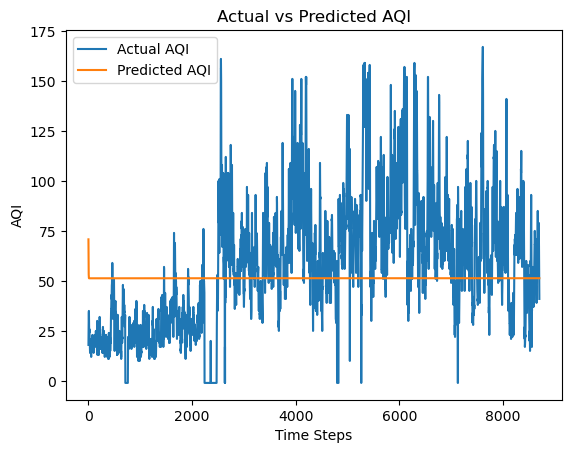

In [33]:
# Generate x-axis values for plotting
time_steps = len(test_data_use)
x = range(time_steps)

# Plot the actual AQI values from the test set
plt.plot(x, test_data_use.iloc[:, 0], label='Actual AQI')

# Plot the predicted AQI values
plt.plot(x, predicted_aqi, label='Predicted AQI')

# Set plot title and labels
plt.title('Actual vs Predicted AQI')
plt.xlabel('Time Steps')
plt.ylabel('AQI')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### LSTM v1-1

In [80]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# columns_to_scale = train_data_use.columns.tolist()[1:]  # 除了"AQI"以外的所有列
# train_data_use[columns_to_scale] = scaler.fit_transform(train_data_use[columns_to_scale])
# test_data_use[columns_to_scale] = scaler.fit_transform(test_data_use[columns_to_scale])

In [181]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [182]:
class AQIDataset(Dataset):
    def __init__(self, dataframe, scaler):
        self.data = dataframe.copy()
        # self.scaler = scaler

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        aqi = sample['"aqi"']
        windspeed = sample['"windspeed"']
        winddirec = sample['"winddirec"']
        temperature = sample['氣溫(℃)']
        humidity = sample['相對溼度(%)']
        max_wind = sample['最大陣風(m/s)']
        rainfall = sample['降水量(mm)']
        rainhour = sample['降水時數(h)']
        return torch.tensor([aqi, windspeed, winddirec, temperature, humidity, max_wind, rainfall, rainhour], dtype=torch.float32)

train_dataset = AQIDataset(train_data_use, scaler)
test_dataset = AQIDataset(test_data_use, scaler)

In [183]:

input_size = 7  # Adjust the input size based on the selected features
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 100
batch_size = 7*24
learning_rate = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [184]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, data in enumerate(train_loader):
        inputs = data[:, 1:].unsqueeze(1).to(device)  # Access the first tensor in the list, select the first column (scaled feature values)
        labels = data[:, 0].unsqueeze(1).to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')

print('Training finished.')

Epoch [1/100], Average Loss: 2664.9893
Epoch [2/100], Average Loss: 1270.0715
Epoch [3/100], Average Loss: 1223.7076
Epoch [4/100], Average Loss: 1223.9953
Epoch [5/100], Average Loss: 1223.6012
Epoch [6/100], Average Loss: 1223.6639
Epoch [7/100], Average Loss: 1223.7669
Epoch [8/100], Average Loss: 1223.4919
Epoch [9/100], Average Loss: 1088.8790
Epoch [10/100], Average Loss: 929.5041
Epoch [11/100], Average Loss: 925.7641
Epoch [12/100], Average Loss: 924.7372
Epoch [13/100], Average Loss: 916.4868
Epoch [14/100], Average Loss: 914.8724
Epoch [15/100], Average Loss: 915.1448
Epoch [16/100], Average Loss: 910.9885
Epoch [17/100], Average Loss: 910.8288
Epoch [18/100], Average Loss: 907.8273
Epoch [19/100], Average Loss: 894.4863
Epoch [20/100], Average Loss: 880.6550
Epoch [21/100], Average Loss: 880.5959
Epoch [22/100], Average Loss: 870.1528
Epoch [23/100], Average Loss: 860.3260
Epoch [24/100], Average Loss: 857.5409
Epoch [25/100], Average Loss: 854.6589
Epoch [26/100], Average L

In [188]:
model.eval()
with torch.no_grad():
    total_loss = 0

    for i, data in enumerate(test_loader):
        inputs = data[:, 1:].unsqueeze(1).to(device)  # Adjust the input indices based on the selected features
        labels = data[:, 0].unsqueeze(1).to(device)
        # print(labels)
        # print('=====================')
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

Test Loss: 734.3406


tensor([[30.9980],
        [31.2581],
        [32.2641],
        [32.3552],
        [32.2369],
        [32.3827],
        [30.5117],
        [29.0652],
        [33.5393],
        [37.2316],
        [34.1662],
        [39.2487],
        [35.2665],
        [33.9443],
        [33.2155],
        [34.0904],
        [30.9004],
        [33.4630],
        [31.4147],
        [31.3583],
        [32.3826],
        [30.7967],
        [36.5131],
        [29.6988],
        [31.2270],
        [30.6979],
        [33.0722],
        [36.5555],
        [41.5336],
        [34.5252],
        [47.3956],
        [37.2831],
        [41.5336],
        [37.6986],
        [33.8431],
        [33.0394],
        [38.2796],
        [39.5688],
        [37.5148],
        [40.3560],
        [38.9639],
        [34.9537],
        [35.1846],
        [35.8323],
        [33.3723],
        [33.1327],
        [33.2073],
        [33.5010],
        [33.1049],
        [32.8820],
        [34.7603],
        [32.2640],
        [29.

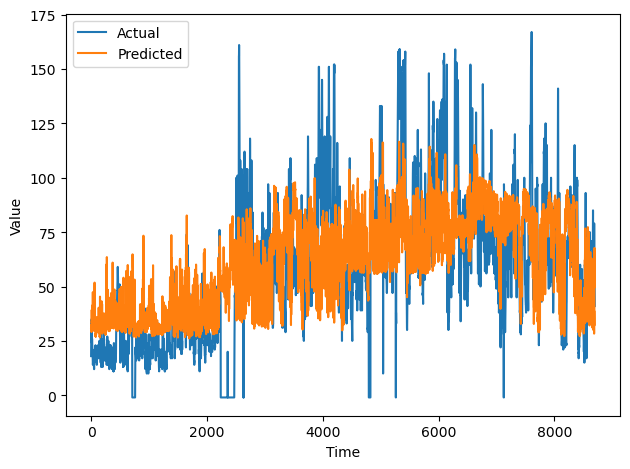

In [189]:
# 將模型設為評估模式
model.eval()
with torch.no_grad():
    # 建立空列表來儲存預測值和實際值
    predictions = []
    actual_values = []

    for data in test_loader:
        inputs = data[:, 1:].unsqueeze(1).to(device)
        labels = data[:, 0].unsqueeze(1).to(device)
        # print(labels)
        outputs = model(inputs)
        print(outputs)
        # 將預測值和實際值轉換為NumPy陣列
        predictions.extend(outputs.cpu().numpy().flatten())
        actual_values.extend(labels.cpu().numpy().flatten())

    # 繪製預測值和實際值的折線圖
    # plt.figure(figsize=(20, 10))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()  
    plt.show()

In [187]:
# 定義分類閥值和對應的分類標籤
thresholds = [0, 50, 100, 150, 200]
labels = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康']

# 使用np.digitize將數值轉換為分類標籤的索引值
indices_test = np.digitize(actual_values, thresholds)
indices_test_prd = np.digitize(predictions, thresholds)
# 根據索引值將數值轉換為對應的分類標籤
y_test = [labels[i-1] for i in indices_test]
y_test_pred = [labels[i-1] for i in indices_test_prd]

# 計算測試集的準確率
accuracy_train = accuracy_score(y_test, y_test_pred)
print("訓練集準確率：", accuracy_train)

# 計算測試集的混淆矩陣
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=labels)
print("測試集混淆矩陣：")
print(confusion_matrix_test)

訓練集準確率： 0.6940229885057472
測試集混淆矩陣：
[[2308  912    0    0]
 [ 587 3721   33    0]
 [  57  627    9    0]
 [ 146  296    4    0]]


In [165]:

input_size = 7  # Adjust the input size based on the selected features
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 80
batch_size = 7*24
learning_rate = 0.01
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [166]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, data in enumerate(train_loader):
        inputs = data[:, 1:].unsqueeze(1).to(device)  # Access the first tensor in the list, select the first column (scaled feature values)
        labels = data[:, 0].unsqueeze(1).to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')

print('Training finished.')

Epoch [1/80], Average Loss: 1991.2622
Epoch [2/80], Average Loss: 1223.9205
Epoch [3/80], Average Loss: 1221.8266
Epoch [4/80], Average Loss: 981.0309
Epoch [5/80], Average Loss: 932.4896
Epoch [6/80], Average Loss: 913.4756
Epoch [7/80], Average Loss: 902.4354
Epoch [8/80], Average Loss: 895.0428
Epoch [9/80], Average Loss: 878.4666
Epoch [10/80], Average Loss: 876.5410
Epoch [11/80], Average Loss: 874.0788
Epoch [12/80], Average Loss: 871.7810
Epoch [13/80], Average Loss: 865.1884
Epoch [14/80], Average Loss: 868.5194
Epoch [15/80], Average Loss: 863.9823
Epoch [16/80], Average Loss: 860.3169
Epoch [17/80], Average Loss: 859.1732
Epoch [18/80], Average Loss: 856.2357
Epoch [19/80], Average Loss: 854.7475
Epoch [20/80], Average Loss: 852.3667
Epoch [21/80], Average Loss: 852.3240
Epoch [22/80], Average Loss: 847.8621
Epoch [23/80], Average Loss: 838.7150
Epoch [24/80], Average Loss: 842.3185
Epoch [25/80], Average Loss: 842.3860
Epoch [26/80], Average Loss: 817.3618
Epoch [27/80], Ave

In [169]:
model.eval()
with torch.no_grad():
    total_loss = 0

    for i, data in enumerate(test_loader):
        inputs = data[:, 1:].unsqueeze(1).to(device)  # Adjust the input indices based on the selected features
        labels = data[:, 0].unsqueeze(1).to(device)
        # print(labels)
        # print('=====================')
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

Test Loss: 778.0790


tensor([[31.0068],
        [31.0513],
        [31.4981],
        [31.7711],
        [31.7711],
        [31.8741],
        [30.9003],
        [30.2944],
        [31.6350],
        [33.0588],
        [31.4286],
        [35.1790],
        [31.9410],
        [35.2790],
        [31.1361],
        [31.5482],
        [30.5728],
        [31.6506],
        [30.8093],
        [30.8587],
        [31.1865],
        [30.8678],
        [50.4936],
        [30.4841],
        [30.8987],
        [30.8077],
        [31.5607],
        [50.6814],
        [53.0975],
        [34.8716],
        [46.2419],
        [34.1884],
        [52.7072],
        [33.1293],
        [31.4741],
        [31.2287],
        [33.2058],
        [34.0627],
        [32.9010],
        [39.3125],
        [50.5538],
        [32.4018],
        [40.4928],
        [50.1765],
        [31.5513],
        [31.4725],
        [31.3959],
        [31.7046],
        [31.5344],
        [31.4365],
        [32.2175],
        [31.3553],
        [30.

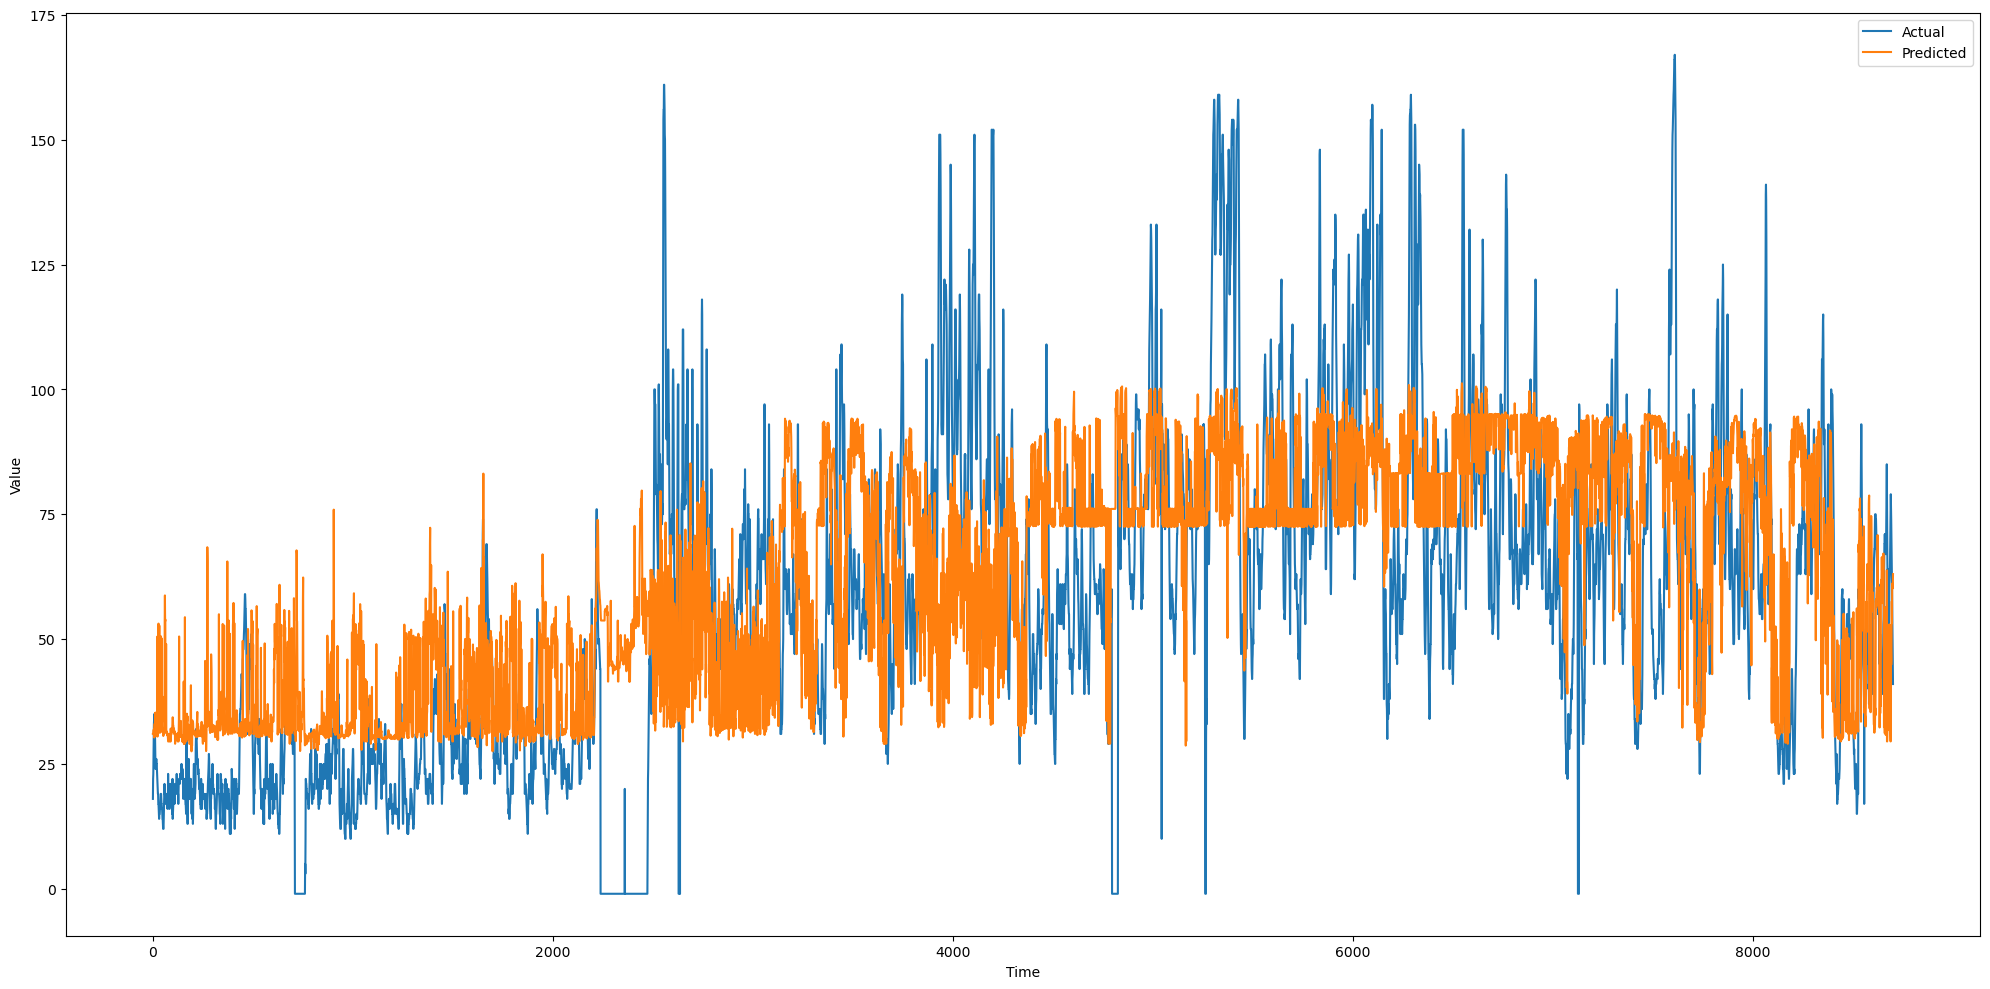

In [170]:
# 將模型設為評估模式
model.eval()
with torch.no_grad():
    # 建立空列表來儲存預測值和實際值
    predictions = []
    actual_values = []

    for data in test_loader:
        inputs = data[:, 1:].unsqueeze(1).to(device)
        labels = data[:, 0].unsqueeze(1).to(device)
        # print(labels)
        outputs = model(inputs)
        print(outputs)
        # 將預測值和實際值轉換為NumPy陣列
        predictions.extend(outputs.cpu().numpy().flatten())
        actual_values.extend(labels.cpu().numpy().flatten())

    # 繪製預測值和實際值的折線圖
    plt.figure(figsize=(20, 10))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()  
    plt.show()

### LSTM V2

In [56]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [57]:
train_data_use

,"""aqi""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
"""datacreationdate""",,,,,,,,
2018-06-01 00:00:00,22.0,2.1,359.0,29.2,76.0,7.5,0.0,0.0
2018-06-01 01:00:00,24.0,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2018-06-01 02:00:00,24.0,2.0,1.4,29.0,77.0,5.1,0.0,0.0
2018-06-01 03:00:00,23.0,1.9,358.0,28.6,79.0,5.3,0.0,0.0
2018-06-01 04:00:00,22.0,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-05-31 19:00:00,24.0,1.0,219.0,29.3,77.0,4.0,0.0,0.0
2022-05-31 20:00:00,23.0,1.4,219.0,29.2,76.0,4.5,0.0,0.0
2022-05-31 21:00:00,22.0,1.1,207.0,29.2,78.0,4.3,0.0,0.0


In [58]:
class AQIDataset(Dataset):
    def __init__(self, dataframe, scaler):
        self.data = dataframe.copy()
        self.scaler = scaler

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        feature_names = ['"windspeed"', '"winddirec"', '氣溫(℃)', '相對溼度(%)', '最大陣風(m/s)', '降水量(mm)', '降水時數(h)']
        scaled_data = self.scaler.transform(sample[feature_names].values.reshape(1, -1))
        scaled_values = scaled_data[0]
        aqi = sample['"aqi"']
        return torch.tensor(scaled_values, dtype=torch.float32), torch.tensor(aqi, dtype=torch.float32)

# Initialize the scalers
scaler = MinMaxScaler(feature_range=(0, 1))
feature_columns = ['"windspeed"', '"winddirec"', '氣溫(℃)', '相對溼度(%)', '最大陣風(m/s)', '降水量(mm)', '降水時數(h)']
scaler.fit(train_data_use[feature_columns].values)

train_dataset = AQIDataset(train_data_use, scaler)
test_dataset = AQIDataset(test_data_use, scaler)

In [59]:
# 取得第一筆資料
sample_data = train_dataset[0]
print(sample_data)
# 分別取出特徵和目標值
features, target = sample_data

# 將特徵和目標值轉換成numpy陣列
features = features.numpy()
target = target.numpy()

# 檢視特徵和目標值的形狀
print("特徵形狀:", features.shape)
print("目標值形狀:", target.shape)

# 檢視特徵和目標值的內容
print("特徵值:", features)
print("目標值:", target)


(tensor([0.2532, 0.9972, 0.7744, 0.6883, 0.2976, 0.0000, 0.0000]), tensor(22.))
特徵形狀: (7,)
目標值形狀: ()
特徵值: [0.25316456 0.99722224 0.7744361  0.6883117  0.29761904 0.
 0.        ]
目標值: 22.0


In [63]:

input_size = 7  # Adjust the input size based on the selected features
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 10
batch_size = 24
learning_rate = 0.01
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [64]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, data in enumerate(train_loader):
        inputs = data[0].unsqueeze(1).to(device)  # Access the first tensor in the list, select the first column (scaled feature values)
        labels = data[1].unsqueeze(1).to(device)
        # print(f"Input shape: {inputs.shape}, Labels shape: {labels.shape}")
        # print(inputs)
        # print('---------------------')
        # print(labels)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')

print('Training finished.')

Epoch [1/10], Average Loss: 1340.6845
Epoch [2/10], Average Loss: 1224.8385
Epoch [3/10], Average Loss: 1224.7025
Epoch [4/10], Average Loss: 1224.4571
Epoch [5/10], Average Loss: 1224.9346
Epoch [6/10], Average Loss: 1225.2841
Epoch [7/10], Average Loss: 1225.0695
Epoch [8/10], Average Loss: 1225.3626
Epoch [9/10], Average Loss: 1225.2907
Epoch [10/10], Average Loss: 1225.5621
Training finished.


In [45]:
model.eval()
with torch.no_grad():
    total_loss = 0

    for i, data in enumerate(test_loader):
        inputs = data[0].unsqueeze(1).to(device)  # Adjust the input indices based on the selected features
        labels = data[1].unsqueeze(1).to(device)
        # print(labels)
        # print('=====================')
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

Test Loss: 1110.3803


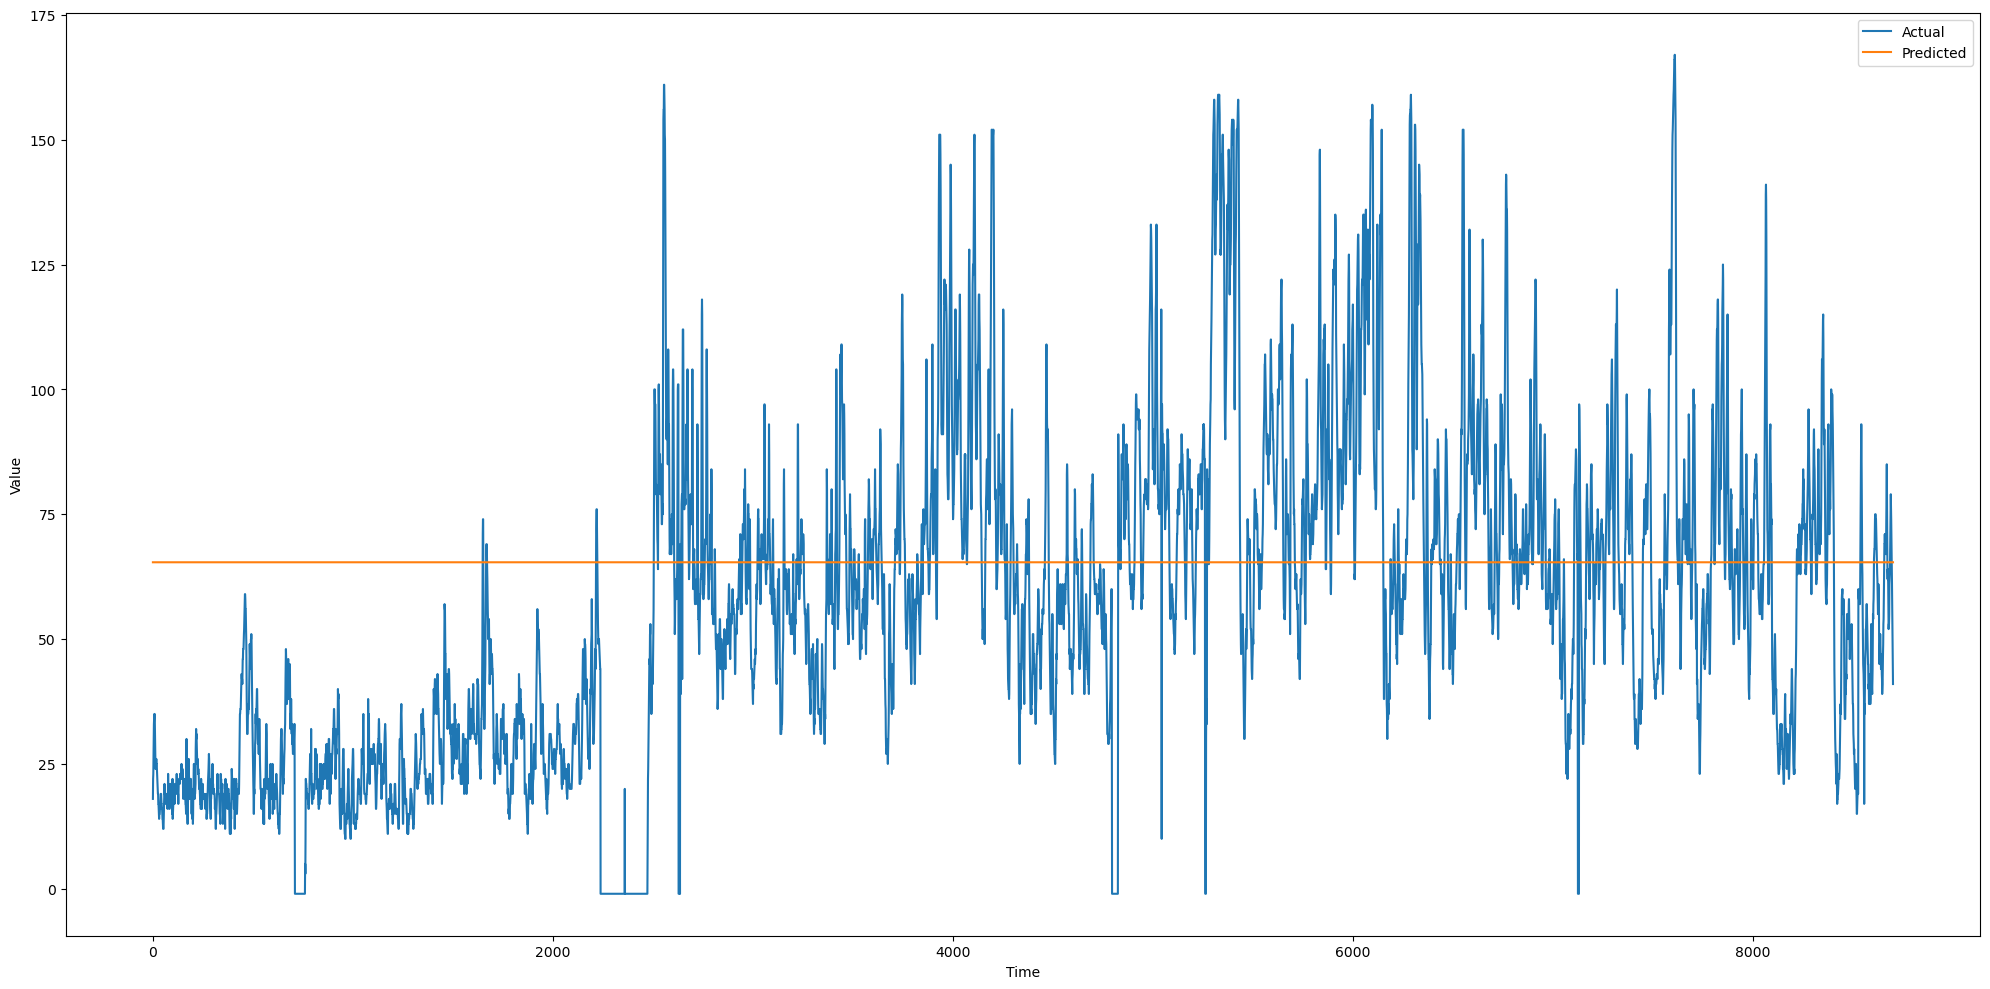

In [65]:
# 將模型設為評估模式
model.eval()
with torch.no_grad():
    # 建立空列表來儲存預測值和實際值
    predictions = []
    actual_values = []

    for i, data in enumerate(test_loader):
        inputs = data[0].unsqueeze(1).to(device)
        labels = data[1].unsqueeze(1).to(device)

        outputs = model(inputs)
        # 將預測值和實際值轉換為NumPy陣列
        predictions.extend(outputs.cpu().numpy().flatten())
        actual_values.extend(labels.cpu().numpy().flatten())

    # 繪製預測值和實際值的折線圖
    plt.figure(figsize=(20, 10))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()  
    plt.show()


tensor([[[0.0886, 0.4361, 0.7481, 0.7532, 0.1270, 0.0000, 0.0000]],

        [[0.0886, 0.4778, 0.7444, 0.7662, 0.1270, 0.0000, 0.0000]],

        [[0.1139, 0.4694, 0.7368, 0.7532, 0.1508, 0.0000, 0.0000]],

        [[0.1772, 0.3972, 0.7180, 0.7532, 0.1865, 0.0000, 0.0000]],

        [[0.2278, 0.3861, 0.7068, 0.7662, 0.2103, 0.0000, 0.0000]],

        [[0.2405, 0.4056, 0.6955, 0.7922, 0.1627, 0.0000, 0.0000]],

        [[0.1519, 0.3972, 0.7293, 0.7792, 0.1468, 0.0000, 0.0000]],

        [[0.0759, 0.3306, 0.7970, 0.7013, 0.1627, 0.0000, 0.0000]],

        [[0.2025, 0.5056, 0.8346, 0.5844, 0.2381, 0.0000, 0.0000]],

        [[0.2785, 0.5250, 0.8759, 0.4805, 0.2421, 0.0000, 0.0000]],

        [[0.2658, 0.6444, 0.8797, 0.5455, 0.2738, 0.0000, 0.0000]],

        [[0.2658, 0.6889, 0.8534, 0.5455, 0.2897, 0.0000, 0.0000]],

        [[0.3671, 0.6250, 0.8534, 0.5584, 0.3373, 0.0000, 0.0000]],

        [[0.4177, 0.7278, 0.8609, 0.5974, 0.3175, 0.0000, 0.0000]],

        [[0.4557, 0.7000, 0.8609, 

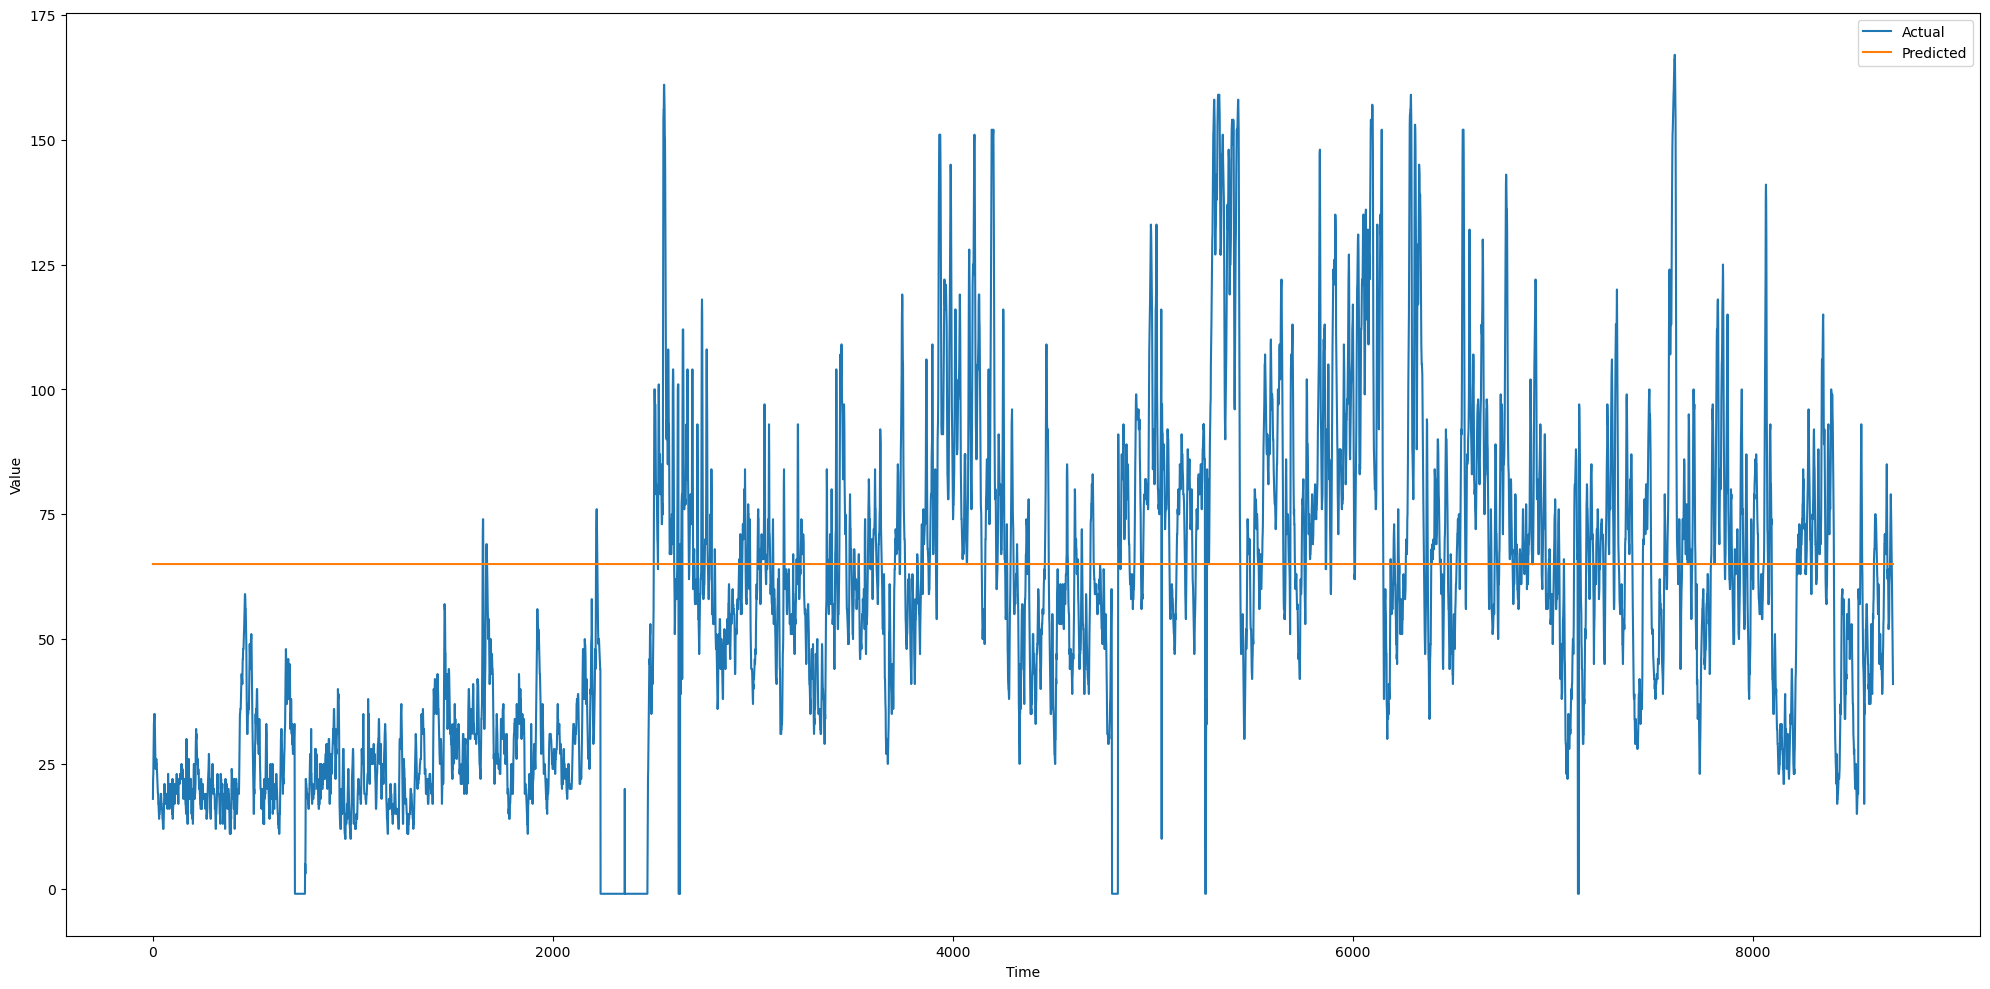

In [57]:
# 將模型設為評估模式
model.eval()
with torch.no_grad():
    # 建立空列表來儲存預測值和實際值
    predictions = []
    actual_values = []

    for i, data in enumerate(test_loader):
    # for data in test_loader:
        inputs = data[0].unsqueeze(1).to(device)
        labels = data[1].to(device)
        print(inputs)
        print('=====================')
        outputs = model(inputs)
        print(outputs)
        # 將預測值和實際值轉換為NumPy陣列
        predictions.extend(outputs.cpu().numpy().flatten())
        actual_values.extend(labels.cpu().numpy().flatten())

    # 繪製預測值和實際值的折線圖
    plt.figure(figsize=(20, 10))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()  
    plt.show()


### XGBoost

In [171]:
# 從訓練集和測試集中分離特徵和目標變數
X_train = train_data_use.drop('"aqi"', axis=1)
y_train = train_data_use['"aqi"']
X_test = test_data_use.drop('"aqi"', axis=1)
y_test = test_data_use['"aqi"']

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立DMatrix資料結構
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)


In [172]:
# 定義模型參數
params = {
    'objective': 'reg:squarederror',  # 使用平方誤差作為目標函數
    'eta': 0.1,  # 學習率
    'max_depth': 6,  # 樹的最大深度
    'colsample_bytree': 0.8,  # 每棵樹使用的特徵比例
    'subsample': 0.8,  # 每棵樹使用的樣本比例
    'eval_metric': 'rmse'  # 評估指標
}

# 訓練模型
model = xgb.train(params, dtrain, num_boost_round=100)

In [173]:
y_train_pred_scaled = model.predict(dtrain)
y_test_pred_scaled = model.predict(dtest)


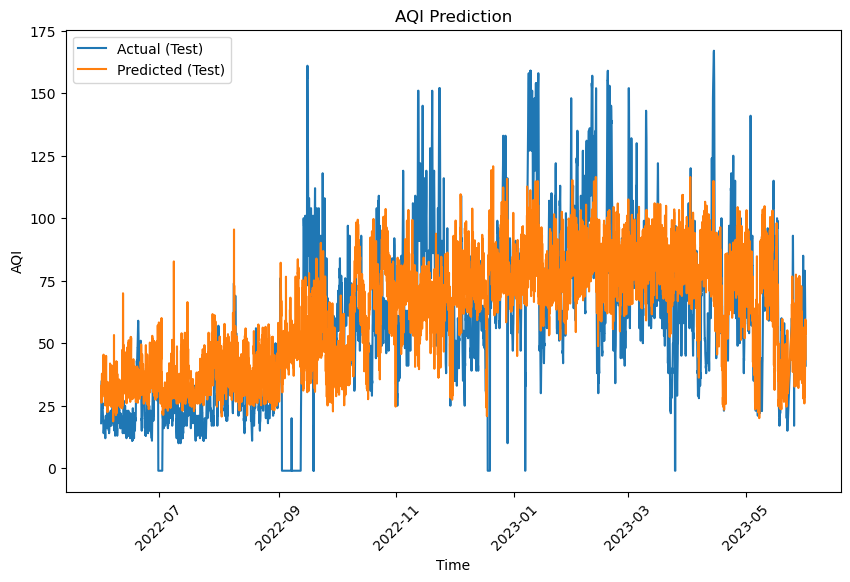

In [174]:
train_dates = train_data_use.index
test_dates = test_data_use.index

plt.figure(figsize=(10, 6))
# plt.plot(train_dates, y_train, label='Actual (Train)')
# plt.plot(train_dates, y_train_pred_scaled, label='Predicted (Train)')
plt.plot(test_dates, y_test, label='Actual (Test)')
plt.plot(test_dates, y_test_pred_scaled, label='Predicted (Test)')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('AQI Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [175]:
y_test_pred_scaled

array([31.413198, 33.05128 , 30.57649 , ..., 58.987705, 53.847816,
       54.455967], dtype=float32)

In [179]:
# 定義分類閥值和對應的分類標籤
thresholds = [0, 50, 100, 150, 200]
labels = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康']

# 使用np.digitize將數值轉換為分類標籤的索引值
indices_test = np.digitize(y_test, thresholds)
indices_test_prd = np.digitize(y_test_pred_scaled, thresholds)
# 根據索引值將數值轉換為對應的分類標籤
y_test = [labels[i-1] for i in indices_test]
y_test_pred = [labels[i-1] for i in indices_test_prd]

# 計算測試集的準確率
accuracy_train = accuracy_score(y_test, y_test_pred)
print("訓練集準確率：", accuracy_train)

# 計算測試集的混淆矩陣
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=labels)
print("測試集混淆矩陣：")
print(confusion_matrix_test)

訓練集準確率： 0.6971264367816092
測試集混淆矩陣：
[[2301  911    8    0]
 [ 532 3728   81    0]
 [  26  631   36    0]
 [ 181  249   16    0]]


XGBoost 參數選擇

In [ ]:
# 定義模型
model = xgb.XGBRegressor(objective='reg:squarederror')

# 定義參數網格
param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'colsample_bytree': [0.8, 1.0],
    'subsample': [0.8, 1.0]
}

# 建立 GridSearchCV 物件
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# 在訓練集上進行網格搜索
grid_search.fit(X_train_scaled, y_train)

# 打印最佳參數組合和對應的 RMSE
print("最佳參數組合：", grid_search.best_params_)
print("最佳 RMSE:", np.sqrt(-grid_search.best_score_))

In [ ]:
# 使用最佳參數構建最終模型
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_model.fit(X_train_scaled, y_train)

# 預測測試集
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
# 計算準確率
thresholds = [0, 50, 100, 150, 200]
labels = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康']

# 使用np.digitize將數值轉換為分類標籤的索引值
indices_test = np.digitize(y_test, thresholds)
indices_test_prd = np.digitize(y_test_pred, thresholds)
# 根據索引值將數值轉換為對應的分類標籤
y_test = [labels[i-1] for i in indices_test]
y_test_pred = [labels[i-1] for i in indices_test_prd]

# 計算準確率
accuracy_test = accuracy_score(y_test, y_test_pred)
print("測試集準確率：", accuracy_test)

# 計算混淆矩陣
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=labels)
print("測試集混淆矩陣：")
print(confusion_matrix_test)